In [168]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns


In [169]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
        'weight', 'acceleration', 'model year', 'origin', 'car name']

c = pd.read_csv('auto-mpg.data.txt', header=None, sep='\s+', names=cols)
c.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [170]:
# use label encoding to turn car name into numerical type
c['car name'] = c['car name'].astype('category').cat.codes
c.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161


In [171]:
# deal with horsepower missing values
c = c[c['horsepower'] != '?']

# turn the horsepower type from object to float
c['horsepower'] = c['horsepower'].astype(float)


<AxesSubplot:>

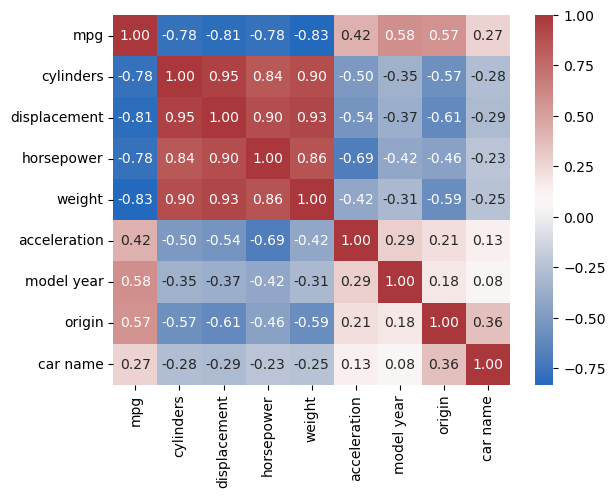

In [172]:
sns.heatmap(c.corr(), cmap='vlag', annot=True, fmt='.2f')


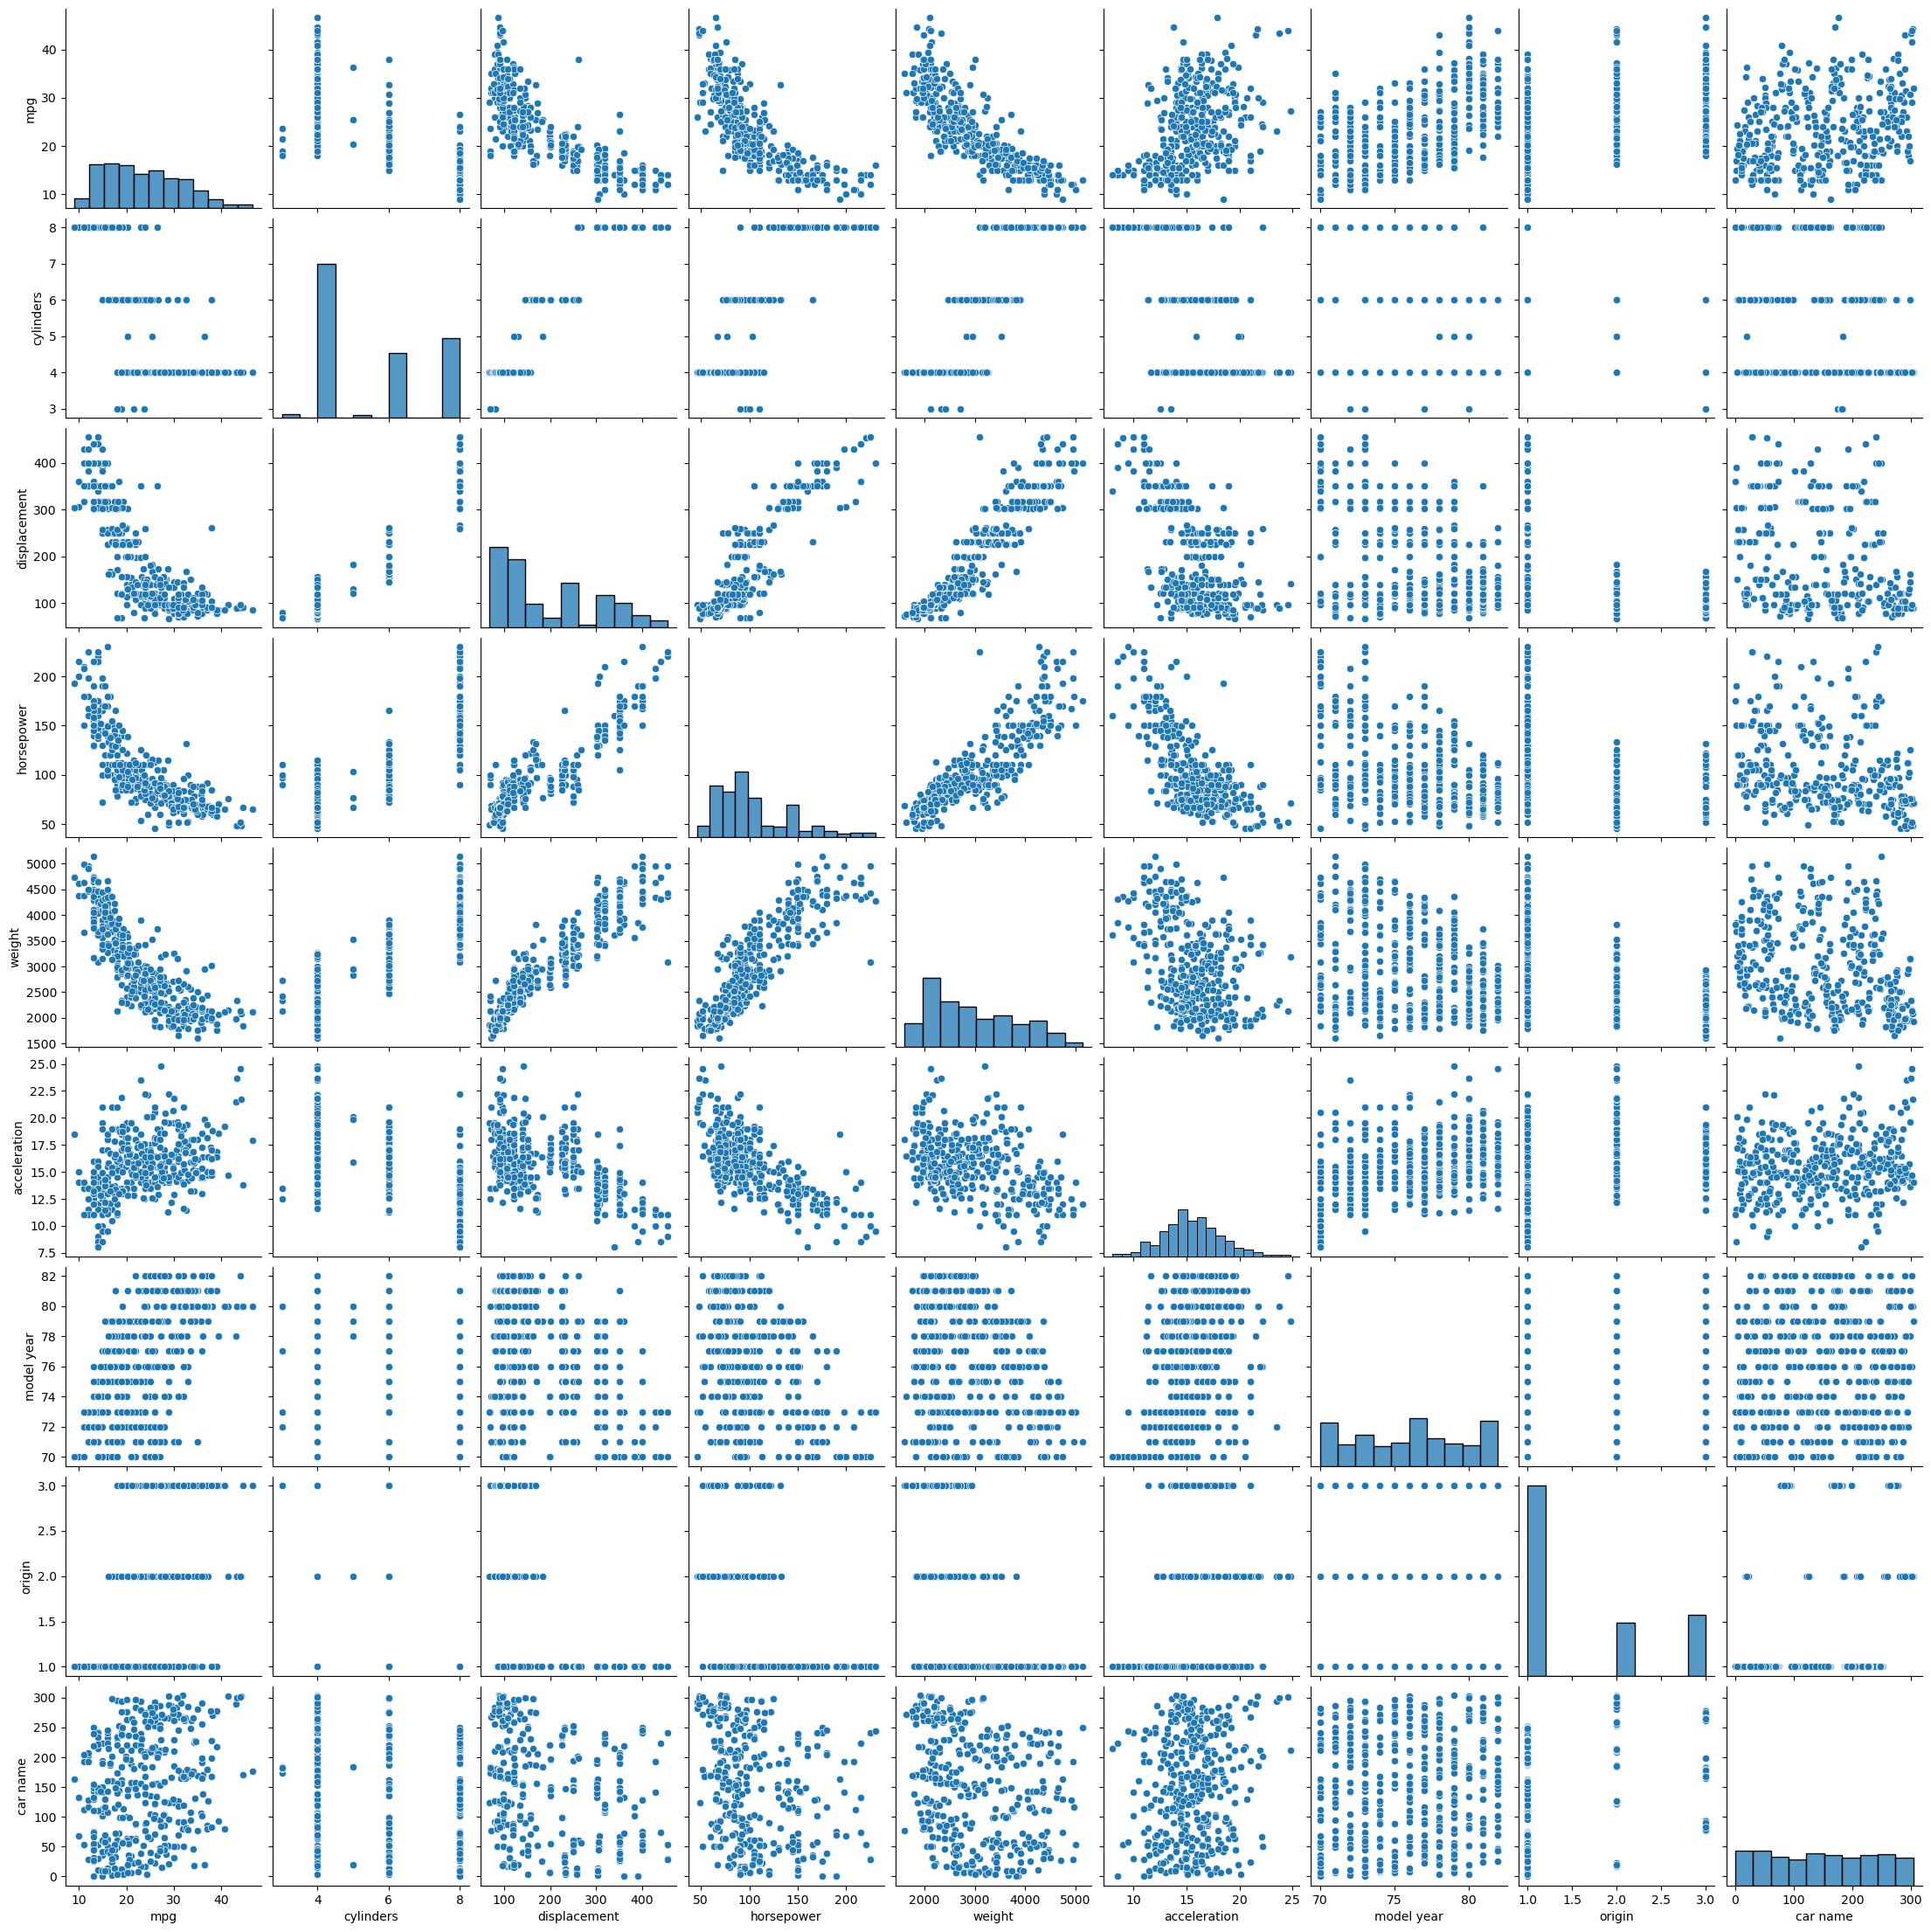

In [173]:
sns.pairplot(c)


In [198]:
def VIF_(df):

    X = df.drop('mpg', axis=1)
    VIF = []
    for column in X.columns:
        try:
            cols = list(X.columns.copy())
            cols.remove(column)
            x = X[cols]
            x = sm.add_constant(x)
            y = c[column]
            model = sm.OLS(y, x).fit()
            VIF.append(1/(1-model.rsquared**2))
        except:
            pass

    return VIF


In [199]:
vif = VIF_(c)


In [200]:
vif_df = pd.DataFrame(vif, columns=['VIF'])
vif_df.index = c.columns[1:]
vif_df.sort_values(by='VIF', ascending=False)


,VIF
displacement,11.196105
weight,5.713883
cylinders,5.635209
horsepower,5.242012
acceleration,1.622494
origin,1.279867
model year,1.040728
car name,1.020823
